# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_20newsgroups
import pickle as pkl
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
# Algumas configurações para o matplotlib.
# %matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
countries = pd.read_csv("countries.csv")

In [4]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.
def adjust_data(file = 'countries.csv'):
    
    new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
    ]
    
    # Corrigir separador
    df = pd.read_csv(file, decimal = ',')
    
    # Renomear colunas
    df.columns = new_column_names
    
    # Remover whitespace
    for c in ['Country', 'Region']:
    
        df[c] = df[c].apply(lambda s: s.strip())
    
    return df

countries = adjust_data()

## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [129]:
def q1():
    # Retorne aqui o resultado da questão 1.
    return list(
        np.sort(countries.Region.unique())
    )

q1()

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [128]:
def q2():
    # Retorne aqui o resultado da questão 2.
    # Criar o bin
    est = KBinsDiscretizer(n_bins = 10, encode = 'ordinal', strategy = 'quantile')
    # Retornar bins
    bins = est.fit_transform(countries[['Pop_density']]) 
    
    return int(
        sum(bins == 9) # Selecionar ultimo bin de número 9
        [0])

q2()

23

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [126]:
def q3():
    # Retorne aqui o resultado da questão 3.
    encoder = OneHotEncoder()
    
    encoded = encoder.fit_transform(
        countries[['Region', 'Climate']]\
            .fillna(999) # Preencher valores NA para retornar no encoding
        )
    return int(encoded.shape[1])

q3()

18

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [9]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [10]:
def q4():
    # Retorne aqui o resultado da questão 4.
    
    # Selecionar colunas com float64 e int64
    cols_bool = (countries.dtypes == 'int64') | (countries.dtypes == 'float64')
    
    # Posicoes das colunas
    cols = np.arange(countries.shape[1])[cols_bool]


    # Criar Pipeline
    pipe = Pipeline([
        ('inputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    # Criar pipeline para selecionar colunas
    pipe_columns = ColumnTransformer(transformers=[
        ('inputer', pipe, cols)
        ])

    # Fit
    pipe_columns.fit(countries)

    # Transformar
    in_transf = np.array(test_country).reshape(1,-1)

    transformed = pipe_columns.transform(in_transf)

    result = pd.DataFrame(transformed, columns=countries.columns[cols_bool])['Arable']

    return float(round(result, 3))
    
q4()

-1.047

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

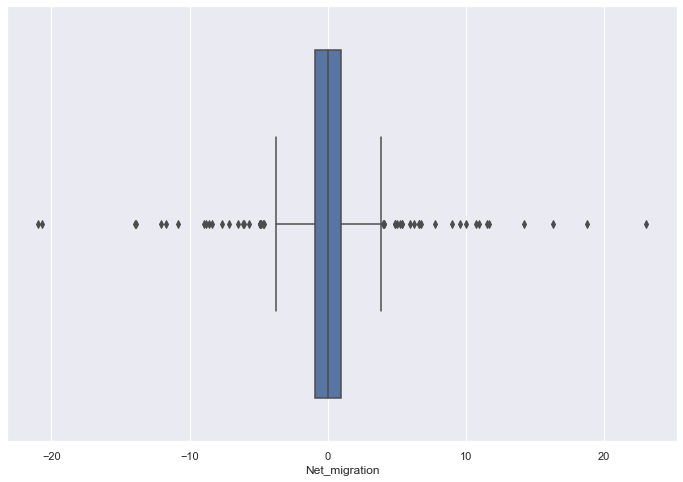

In [44]:
if __name__=='__main__':
    sns.boxplot(countries.Net_migration.dropna())
    plt.show()

In [124]:
def q5():
    # Retorne aqui o resultado da questão 4.
    q1, q3 = np.quantile(countries.Net_migration.dropna(), [.25, .75])
    iq = q3 - q1

    lower_bound = q1 - (1.5 * iq)
    upper_bound = q3 + (1.5 * iq)

    return (
    int((countries.Net_migration.dropna() < lower_bound).sum()),
    int((countries.Net_migration.dropna() > upper_bound).sum()),
    False # A variabel não possui um dominio específico que permite determinar se os valores sao inválidos
    )

q5()

(24, 26, False)

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [46]:
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context

In [47]:
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']

In [48]:
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)

In [110]:
print(f'{len(newsgroup.data)} arquivos')

1773 arquivos


In [119]:
def q6():
    # Retorne aqui o resultado da questão 4.
    # Vetorizados
    vectorizer = CountVectorizer()
    # Contagem
    vectorizer_counts = vectorizer.fit_transform(newsgroup.data)
    # Posicao da palavra phone na matriz
    arg_phone = vectorizer.vocabulary_['phone']
    
    return int(np.sum(vectorizer_counts, axis = 0)[0,arg_phone])

q6()

213

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [125]:
def q7():
    # Retorne aqui o resultado da questão 4.
    # Vectorizer
    tf = TfidfVectorizer()
    # Contagem
    tf_count = tf.fit_transform(newsgroup.data)
    # Argumento da palavra phone
    arg_phone = tf.vocabulary_['phone']

    return float(round(tf_count[:,arg_phone].sum(),3))


q7()

8.888